In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [3]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
import mlflow

In [16]:
(X_trian, y_train), (X_test, y_test) = load_data()

X_train = X_trian.reshape(X_trian.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_trian.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28, 1), (10000,))

In [17]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.9, 1.1],
    rotation_range=10,
    rescale=1./255
)
val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [19]:
train_dataset = train_datagen.flow(X_train, y_train, batch_size=32)
val_dataset = val_datagen.flow(X_test, y_test, batch_size=32)

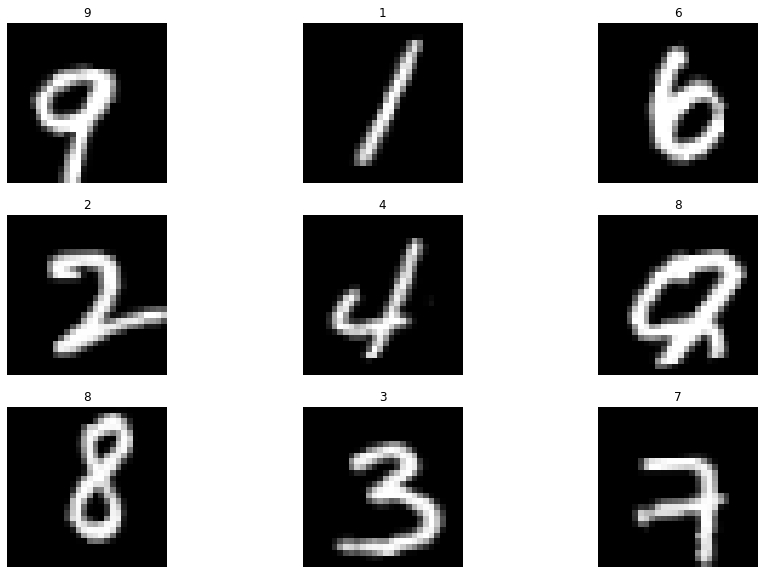

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(15, 10))

X, y = train_dataset.next()

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(X[i * 3 + j].reshape(28, 28), cmap="gray")
        ax[i, j].set_title(y[i * 3 + j])
        
        ax[i, j].axis("off")

plt.show()

mlflow.log_figure(fig, "train-batch1")

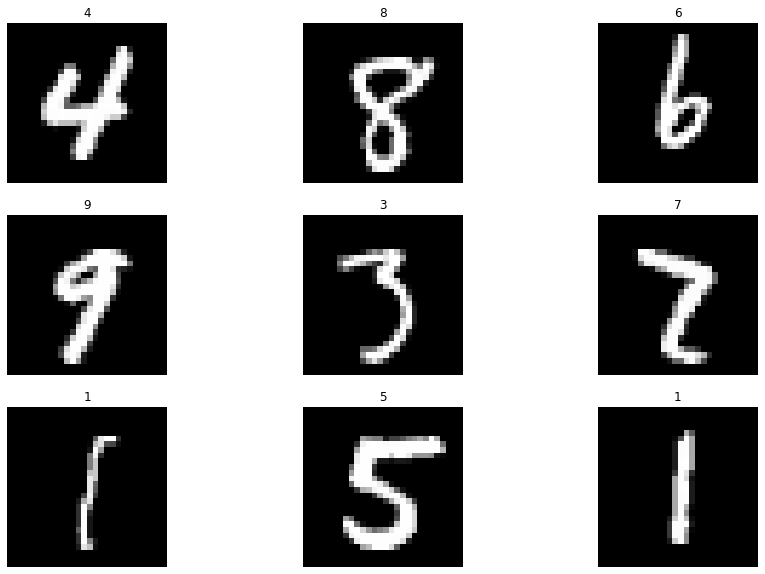

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(15, 10))

X, y = val_dataset.next()

for i in range(3):
    for j in range(3):
        ax[i, j].imshow(X[i * 3 + j].reshape(28, 28), cmap="gray")
        ax[i, j].set_title(y[i * 3 + j])
        
        ax[i, j].axis("off")

plt.show()

mlflow.log_figure(fig, "val-batch1")

In [ ]:
import mlflow.tensorflow
mlflow.tensorflow.autolog()

In [ ]:
mlflow.end_run()